In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cpi
plt.style.use('ggplot')

df = pd.read_csv('../data/Prices_E_All_Data.csv',encoding = "ISO-8859-1")

def clean_columns(df):
    cols = df.columns
    cols = [col.lower().replace(' ', '_') for col in cols]
    new_cols = []
    for col in cols:
        if col[0] == 'y':
            new_cols.append(col[1:])
        else:
            new_cols.append(col)
    df.columns = new_cols
    return df

def remove_flags(df):
    cols = df.columns
    lst = []
    for col in cols:
        if col[-1] == 'f':
            lst.append(col)
    df = df.drop(lst,axis=1)
    return df

def get_USD_prices(df,crop):
    prices = df[(df['item'] == crop) & (df['unit']=='USD')]
    return prices

def adjust_prices(df):
    years = df.columns
    for i in range(26):
        df[years[i+7]]=df[years[i+7]].apply(lambda x: cpi.inflate(x,int(years[i+7])))
    return df


In [18]:
df = clean_columns(df)
df = remove_flags(df)
usd = get_USD_prices(df,'Cloves')
adjusted = adjust_prices(usd)
adjusted.head()
print(adjusted.iloc[2,7:])

grouped = adjusted.groupby('item')
print(grouped.mean().iloc[0,3:])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1991    5396.59
1992    4785.17
1993    3086.79
1994    3285.74
1995    2793.15
1996    3233.98
1997    2261.37
1998    2170.92
1999    2379.94
2000    3826.98
2001    5073.33
2002    9714.31
2003    4130.16
2004    4389.92
2005    5604.07
2006    5255.44
2007    4636.85
2008       5185
2009    4863.14
2010    5884.99
2011    12126.4
2012    9664.37
2013    8836.29
2014    10619.6
2015    8381.08
2016    7912.36
2017     6729.1
Name: 22380, dtype: object
1991     4080.273656
1992     2676.744540
1993     2116.655337
1994     2154.459654
1995     1778.180278
1996     1916.831446
1997     1460.071169
1998     1823.529791
1999     2993.589333
2000     4292.442307
2001     4955.121418
2002     6977.257148
2003     3059.866168
2004     3930.841474
2005     4720.310157
2006     2845.443384
2007     2541.383242
2008     2837.189652
2009     2677.368972
2010     3236.317998
2011    12126.398752
2012     9664.372304
2013     8836.286281
2014    10619.563829
2015     8381.075010
2016     7912.36

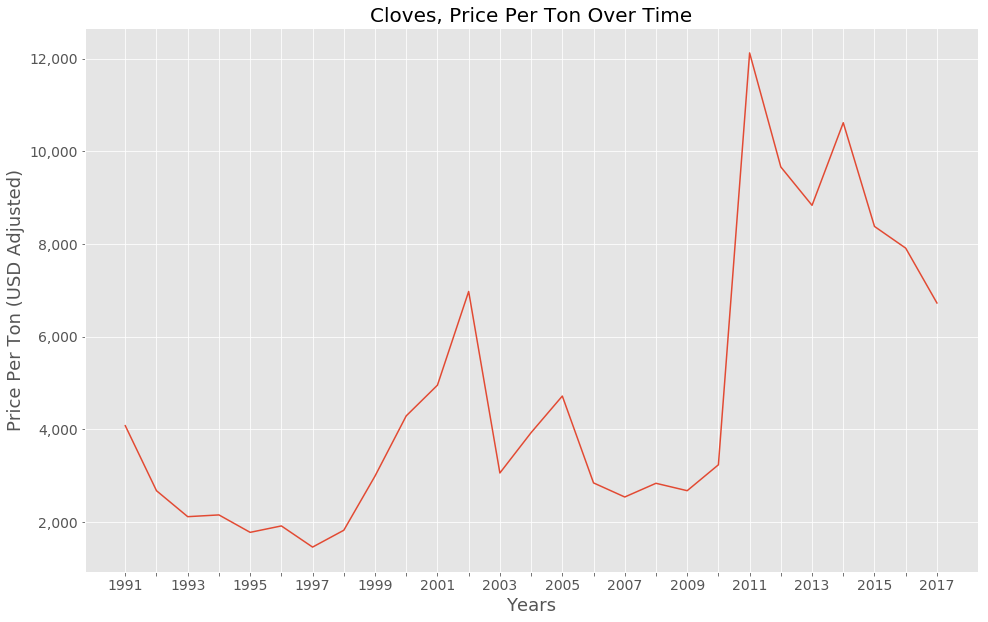

In [37]:
import matplotlib as mpl
fig,ax = plt.subplots(figsize=(16,10))
grouped = adjusted.groupby('item')
grouped.mean().iloc[:,3:]
# plt.plot(adjusted.iloc[2,7:])
plt.plot(grouped.mean().iloc[0,3:])
n = 2
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
for label in ax.get_yticklabels():
    label.set_fontsize(14)
for label in ax.get_xticklabels():
    label.set_fontsize(14)
ax.set_title('Cloves, Price Per Ton Over Time',size=20)
ax.set_ylabel('Price Per Ton (USD Adjusted)',size=18)
ax.set_xlabel('Years',size=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig('../images/clovesprice.png')

In [37]:
adjusted.iloc[:,7:]

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
11091,5940.100171,2509.459192,2445.903824,2183.377059,1826.786948,1767.831690,1642.443169,751.626413,1084.010531,3690.339634,...,489.377748,491.593245,587.646761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14324,904.132693,735.602117,817.270741,994.261725,714.600432,748.679762,476.399262,2548.042810,5516.817776,5360.011614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22380,5396.588104,4785.172311,3086.791447,3285.740178,2793.153454,3233.982887,2261.371077,2170.920150,2379.939694,3826.975672,...,5185.001555,4863.144699,5884.989236,12126.398752,9664.372304,8836.286281,10619.563829,8381.07501,7912.360049,6729.1


In [57]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# read in csv
df = pd.read_csv('../data/Production_Crops_E_All_Data_NOFLAG.csv', encoding = "ISO-8859-1")

# clean column names
cols = df.columns
cols = [col.lower().replace(' ', '_') for col in cols]
new_cols = []
for col in cols:
    if col[0] == 'y':
        new_cols.append(col[1:])
    else:
        new_cols.append(col)
df.columns = new_cols

df = df[df['area_code']<1000]
df = df[df['area'] != 'China, mainland']

def yield_cagr(df):
    yield_df = df.loc[df['element'] == 'Yield']
    print(yield_df[['1961','2017']][(yield_df.item=='Cloves')])
    grouped = yield_df.groupby('item').mean()
    print(grouped.loc['Cloves', '2017'])
    grouped['cagr'] = (grouped['2017']/grouped['1987'])**(1/30) - 1
    return grouped

In [58]:
df = yield_cagr(df)


         1961     2017
6310      NaN  13911.0
7624      NaN   2756.0
15728  3500.0   2258.0
18089     NaN  10141.0
19939  3143.0   3281.0
20358  2500.0   2296.0
30660  2500.0  10160.0
34529  3800.0  12789.0
7199.0


In [68]:
std = np.std(df['cagr'])
m = np.mean(df['cagr'])
print(m)
print(std)

0.008983989468500531
0.009555588660358742


In [67]:
dist = stats.norm(loc=m,scale=std)
1-dist.cdf(.039)

0.000841286817384379

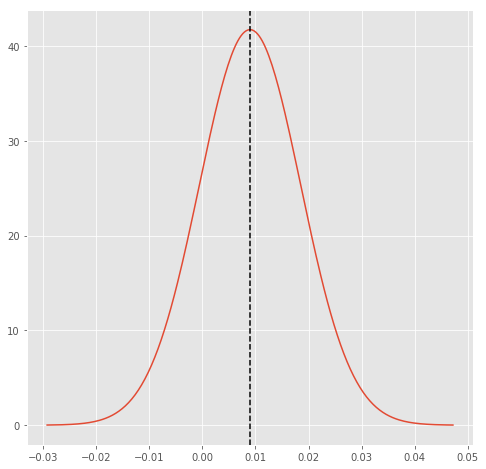

In [61]:
fig,ax = plt.subplots(figsize=(8,8))
x = np.linspace((m-4*std), (m+4*std), num=250)
y = dist.pdf(x)
ax.plot(x,y)
ax.axvline(m,color='black',linestyle='--')

In [62]:
bootstrap = np.random.choice(df['cagr'], size=df.shape[0], replace=True)
bootstrap
np.nanmean(bootstrap)

0.009349175070377152

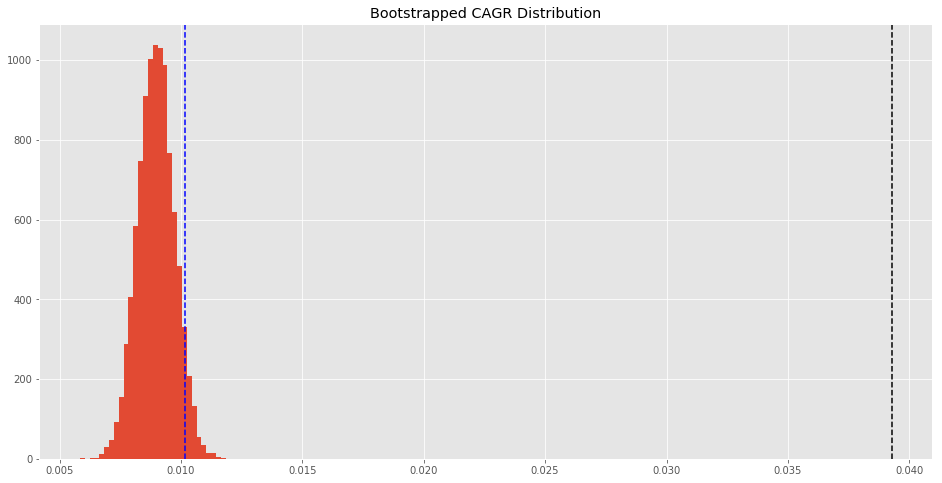

In [75]:
bootstrap_means = []
for i in range(10000):
    bootstrap = np.random.choice(df['cagr'], size=df.shape[0], replace=True)
    bootstrap_means.append(np.nanmean(bootstrap))
fig,ax = plt.subplots(figsize=(16,8))
plt.hist(bootstrap_means,bins=30)
ax.set(title='Bootstrapped CAGR Distribution')
ax.axvline(df.loc['Cloves','cagr'],color='black',linestyle='--')
ax.axvline(df.loc['Vegetables Primary','cagr'],color='blue',linestyle='--')

In [69]:
print(df.loc['Cloves','2017'])
print(df.loc['Cloves','1997'])
print(df.loc['Cloves','cagr'])

7199.0
2903.75
0.03926752125986965


In [45]:
df.head()

,area_code,item_code,element_code,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,cagr
item,,,,,,,,,,,,,,,,,,,,,
Agave fibres nes,95.750000,800.0,5419.0,9492.500000,9015.666667,9192.000000,9203.166667,9132.166667,9086.000000,9205.333333,...,8184.125000,8063.250000,7944.375000,7766.750000,7913.500000,7644.500000,7477.500000,7526.125000,7442.000000,-0.017011
"Almonds, with shell",144.510204,221.0,5419.0,18133.800000,18472.133333,17908.466667,19829.133333,18555.466667,18306.000000,23345.866667,...,15196.170213,17128.659574,18029.042553,20286.063830,23719.255319,19010.872340,20382.065217,21329.391304,21248.195652,0.013621
"Anise, badian, fennel, coriander",142.317073,711.0,5419.0,10144.384615,10533.153846,10515.615385,12003.428571,12818.000000,13173.500000,13853.857143,...,13773.894737,14373.868421,13700.473684,12987.447368,14371.157895,13286.684211,14531.473684,15115.578947,16377.342105,0.021660
Apples,132.690000,515.0,5419.0,129624.888889,137922.400000,131038.422222,143902.955556,134858.155556,143607.090909,163652.318182,...,149146.148936,146620.138298,151295.234043,141807.819149,154065.936170,163306.872340,165082.382979,157015.361702,152125.563830,0.009154
Apricots,135.000000,526.0,5419.0,65467.483871,62443.064516,68556.548387,67435.903226,71379.612903,69255.096774,78493.225806,...,69358.014706,63100.970588,69643.955882,67730.852941,69634.779412,67737.544118,73579.676471,68339.558824,71730.955882,0.010020


In [ ]:
df[df['item']=='Cloves']